In [2]:
import pandas as pd
import numpy as np
from sklearn import metrics, isotonic
from sklearn.calibration import CalibratedClassifierCV, calibration_curve
import json
import matplotlib.pyplot as plt
import re
import os
# from svmlight_loader import load_svmlight_file

In [3]:
data_dir = '/data-1/shared/swhj_ln_20170725'
pivoted_dir = 'transformed_data'

In [3]:
data = load_svmlight_file(os.path.join(data_dir, 'lgb_test.libsvm'))

In [4]:
print data[0].shape
print len(data[1])

(91390, 2521)
91390


In [5]:
label_y = data[1]
print len(label_y)
print sum(label_y)
default_rate = sum(label_y)/len(label_y)
print default_rate

91390
3495.0
0.0382426961374


In [6]:
df_test = pd.read_csv(os.path.join(data_dir, 'predict_result_0810.csv'), header=0, encoding='utf-8')
print df_test.shape
pred_y = df_test['predict_value'].tolist()
print len(pred_y)
print pred_y[:10]

(91390, 1)
91390
[0.0300024310053, 0.0081699297605599998, 0.0021392573899400003, 0.0034380019788300001, 0.114680774877, 0.051797569691099998, 0.0059364603771599996, 0.040653014893300005, 0.0036963105351399995, 0.00369366747059]


In [7]:
test_auc = metrics.roc_auc_score(label_y, pred_y)
print test_auc

0.84078757322


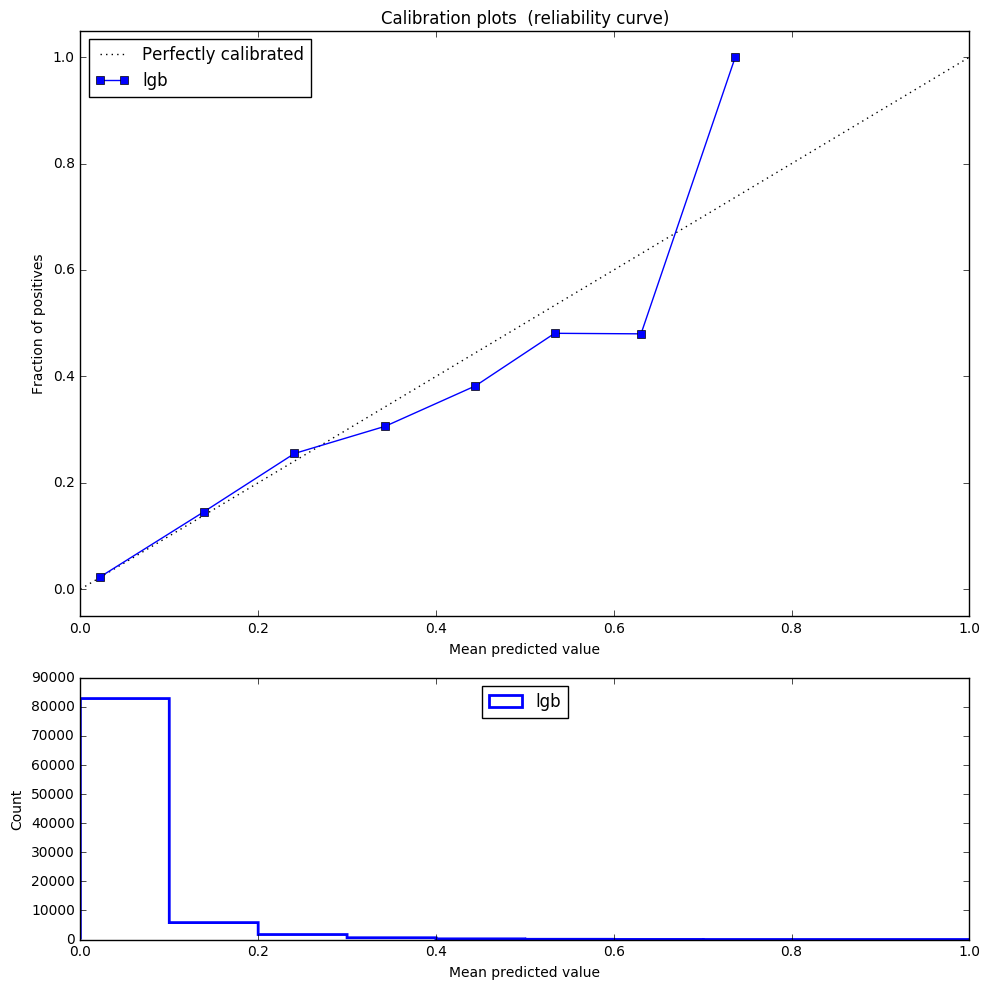

In [8]:
fig = plt.figure(1, figsize=(10, 10))
ax1 = plt.subplot2grid((3, 1), (0, 0), rowspan=2)
ax2 = plt.subplot2grid((3, 1), (2, 0))

ax1.plot([0, 1], [0, 1], "k:", label="Perfectly calibrated")

# label_y为真实标签值， predict_y为模型预测的概率值
fraction_of_positives, mean_predicted_value = calibration_curve(label_y, pred_y, n_bins=10)
ax1.plot(mean_predicted_value, fraction_of_positives, "s-", label='lgb')
ax2.hist(pred_y, range=(0, 1), bins=10, label='lgb', histtype="step", lw=2)

ax1.set_ylabel("Fraction of positives")
ax1.set_xlabel("Mean predicted value")
ax1.set_ylim([-0.05, 1.05])
ax1.legend(loc="upper left")
ax1.set_title('Calibration plots  (reliability curve)')

ax2.set_xlabel("Mean predicted value")
ax2.set_ylabel("Count")
ax2.legend(loc="upper center", ncol=2)

plt.tight_layout()
plt.show()


In [9]:
print fraction_of_positives
print mean_predicted_value 

[ 0.02276591  0.1456077   0.25513196  0.30629139  0.38222222  0.48101266
  0.48        1.        ]
[ 0.02185491  0.13902944  0.24084481  0.3429569   0.44443473  0.53352215
  0.63065398  0.73661015]


In [70]:
max(pred_y)

0.78675572070299993